# Multinomial Partial Dependency plot

Authors Lauren DiPerna, Veronika Maurerova

## Build a GLM with the Iris Dataset

In [7]:
# Import the Iris Dataset and Build a GLM
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# import the iris dataset:
# this dataset is used to classify the type of iris plant
# the original dataset can be found at https://archive.ics.uci.edu/ml/datasets/Iris
# iris = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv")
iris = h2o.import_file("../../smalldata/iris/iris_wheader.csv")

# convert response column to a factor
iris['class'] = iris['class'].asfactor()

# set the predictor names and the response column name
predictors = iris.col_names[:-1]
response = 'class'

# split into train and validation
train, valid = iris.split_frame(ratios = [.8], seed=1234)

# build model
model = H2OGeneralizedLinearEstimator(family = 'multinomial')
model.train(x = predictors, y = response, training_frame = train, validation_frame = valid)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,38 mins 55 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.99999
H2O_cluster_version_age:,20 hours and 1 minute
H2O_cluster_name:,mori
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.916 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


## Specify Feature of Interest
In the cell below, if you decide to use a different dataset, model, or features please update the following variables:
* model
* data_pdp
* col

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# hide progress bar
h2o.no_progress()

# specify the model to you:
model = model

# specify the dataframe to use
data_pdp = iris

# specify the feature of interest, available features include: 
# ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
# col = "sepal_len"
# col = 'sepal_wid'
col = 'petal_len'
# col = 'petal_wid'

# create a copy of the column of interest, so that values are preserved after each run
col_data = data_pdp[col]

## Generate a PDP per class manualy

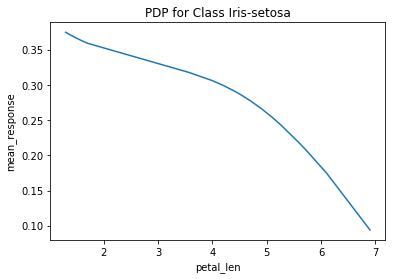

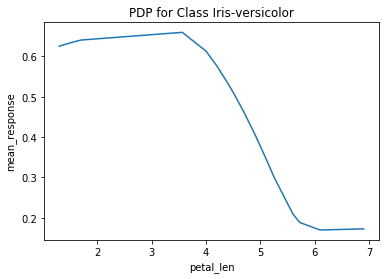

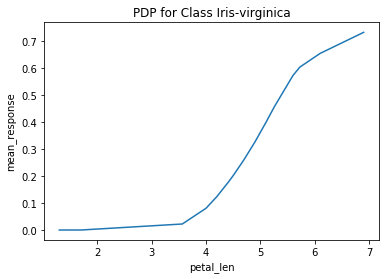

In [9]:
# get a list of the classes in your target
classes = h2o.as_list(data_pdp['class'].unique(), use_pandas=False,header=False)
classes = [class_val[0] for class_val in classes]


# create bins for the pdp plot
bins = data_pdp[col].quantile(prob=list(np.linspace(0.05,1,19)))[:,1].unique()
bins = bins.as_data_frame().values.tolist()
bins = [bin_val[0] for bin_val in bins]
bins.sort()


# Loop over each class and print the pdp for the given feature
for class_val in classes:
    mean_responses = []

    for bin_val in bins:
        # warning this line modifies the dataset.
        # when you rerun on a new column make sure to return
        # all columns to their original values.
        data_pdp[col] = bin_val
        response = model.predict(data_pdp)
        mean_response = response[:,class_val].mean()[0]
        mean_responses.append(mean_response)
        mean_responses

    pdp_manual = pd.DataFrame({col: bins, 'mean_response':mean_responses},columns=[col,'mean_response'])
    plt.plot(pdp_manual[col], pdp_manual.mean_response);
    plt.xlabel(col);
    plt.ylabel('mean_response');
    plt.title('PDP for Class {0}'.format(class_val));
    plt.show()


# reset col value to original value for future runs of this cell
data_pdp[col] = col_data

## Use target parameter and plot H2O multinomial PDP 

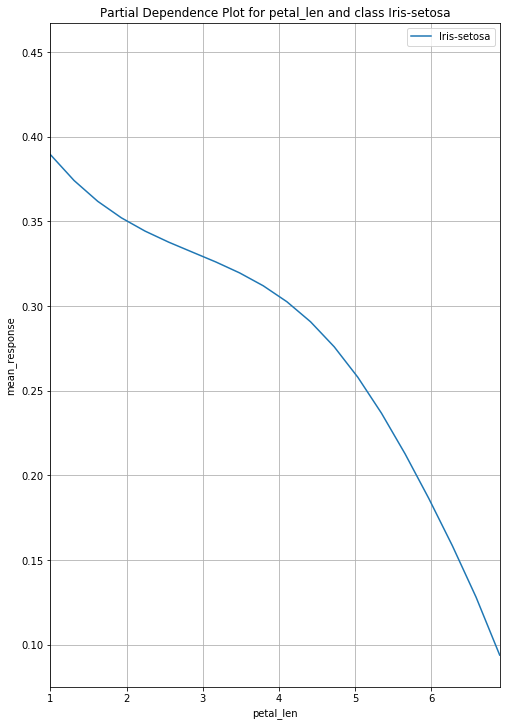

In [11]:
# h2o multinomial PDP class setosa
data = model.partial_plot(data=iris, cols=["petal_len"], plot_stddev=False, plot=True, targets=["Iris-setosa"])

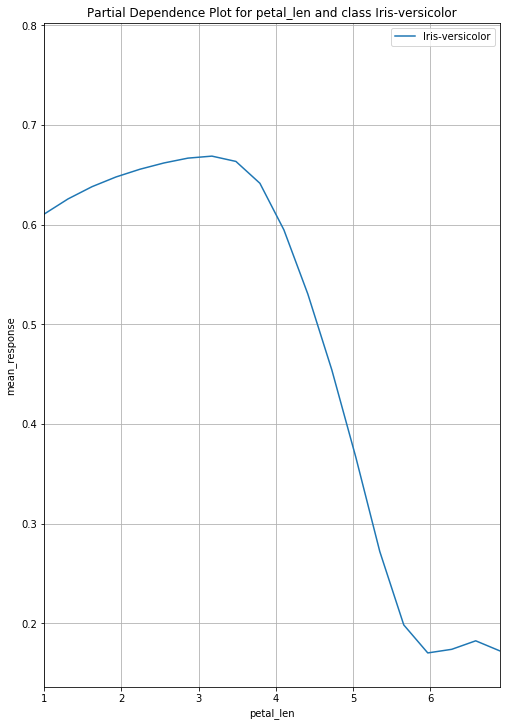

In [12]:
# h2o multinomial PDP class versicolor
data = model.partial_plot(data=iris, cols=["petal_len"], plot_stddev=False, plot=True, targets=["Iris-versicolor"])

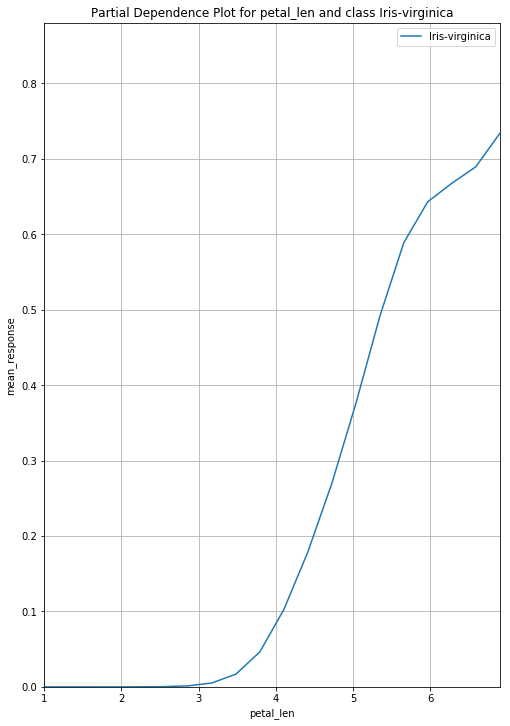

In [13]:
# h2o multinomial PDP class virginica
data = model.partial_plot(data=iris, cols=["petal_len"], plot_stddev=False, plot=True, targets=["Iris-virginica"])

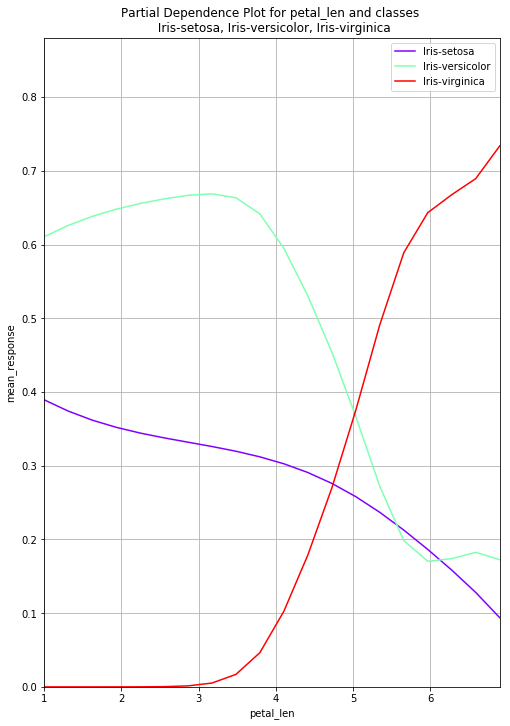

In [14]:
# h2o multinomial PDP all classes
data = model.partial_plot(data=iris, cols=["petal_len"], plot_stddev=False, plot=True, targets=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

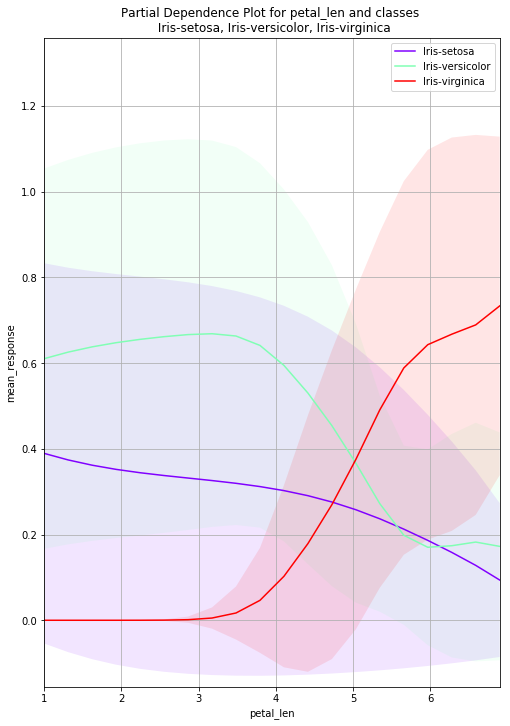

In [16]:
# h2o multinomial PDP all classes with stddev
data = model.partial_plot(data=iris, cols=["petal_len"], plot_stddev=True, plot=True, targets=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])